Task 1

PROBLEM IDENTIFICATION:

The dataset, sourced from an Iranian telecom company's database over a 12-month period, offers a valuable resource for predicting customer churn. However, several challenges need consideration when building a data pipeline and implementing a random forest classifier. Firstly, the potential imbalance in the churn variable warrants attention, ensuring a representative distribution of both churn and non-churn instances for effective model training. The temporal misalignment arising from aggregating data over the first 9 months while labeling churn at the end of the 12th month requires careful handling. Understanding and mitigating the impact of the designated three-month planning gap on predictive features is crucial. Additionally, the presence of ordinal attributes, such as "Charge Amount," "Age Group," and "Tariff Plan," necessitates proper treatment during preprocessing. Handling categorical variables like "Complaints," "Tariff Plan," and "Status" is crucial, likely involving techniques such as one-hot encoding. Data quality issues, including missing values and outliers, should be addressed, and appropriate scaling of numerical attributes may enhance model robustness. Lastly, defining relevant evaluation metrics and fine-tuning random forest hyperparameters, such as tree depth and minimum samples per leaf, will contribute to the development of an accurate and reliable churn prediction model.

In [105]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
import warnings
warnings.filterwarnings("ignore")# Ignoring warnings for cleaner output

In [106]:
#Creating 'df' variable to import data
df = pd.read_csv("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//DA//Iranian Customer Churn.csv")
df.head(2)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0


In [107]:
# Printing the count of missing values in each column of the DataFrame
print(df.isna().sum())

# Displaying an empty line for better readability
print()

# Printing the shape (number of rows and columns) of the DataFrame
print("Shape of Data Frame:", df.shape)

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

Shape of Data Frame: (3150, 14)


In [108]:
df.info() #Information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

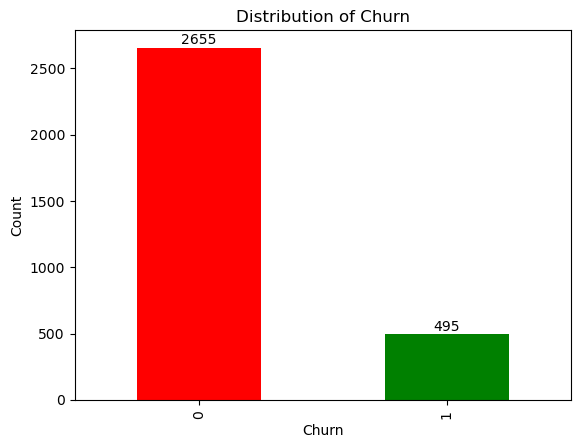

In [109]:
# Importing the necessary plotting library
import matplotlib.pyplot as plt

# Counting the occurrences of each unique value in the 'Churn' column
value_counts = df['Churn'].value_counts()

# Creating a bar plot to visualize the distribution of 'Churn'
ax = value_counts.plot(kind='bar', color=['Red', 'Green'])

# Adding title and axis labels to the plot
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Displaying the count of each bar on top
for i, v in enumerate(value_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')

# Showing the plot
plt.show()

In [111]:
#Plotting a scatter plot

import plotly.express as px
fig = px.scatter(df, 
             x = 'Frequency of use',
             y = 'Call  Failure',
             color = 'Churn')
fig.show()

In [7]:
df.head(2)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0


In [8]:
#Popout target to separate predictors and target

y = df.pop('Churn')
y[:3]

0    0
1    0
2    0
Name: Churn, dtype: int64

In [9]:
#Importing required librarires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Defining lists of numeric and categorical column names
numeric_columns = ['Call  Failure', 'Subscription  Length', 'Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age','Customer Value']
categorical_columns= ['Charge  Amount','Age Group','Tariff Plan','Status']

X=df# Assigning the DataFrame 'df' to the variable 'X' for convenience in subsequent operations

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = numeric_columns
categorical_features= categorical_columns

ntransformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

ctransformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Create a column transformer to apply transformations to different feature types
ct_transformer = ColumnTransformer(
    transformers=[
        ("num", ntransformer, numeric_features),
        ("cat", ctransformer, categorical_features)
    ])

# Create a pipeline with preprocessing and a classification model (RandomForestClassifier)
pipeline = Pipeline(steps=[
    ("Transformer", ct_transformer),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       645
           1       0.90      0.78      0.83       143

    accuracy                           0.94       788
   macro avg       0.93      0.88      0.90       788
weighted avg       0.94      0.94      0.94       788



INTERPRETATION for classification report:

The classification report presents a comprehensive evaluation of a machine learning model's performance on a binary classification task. For class 0, representing a majority class, the model exhibits high precision (95%), indicating that the instances predicted as class 0 are accurate. The recall for class 0 is also excellent at 98%, demonstrating the model's ability to capture the majority of actual class 0 instances. The F1-score for class 0 is 0.97, indicating a harmonious balance between precision and recall. However, for class 1, which represents a minority class, the model shows a trade-off between precision (90%) and recall (78%), resulting in a lower F1-score of 0.83. Despite this imbalance, the overall accuracy is 94%, reflecting the proportion of correctly classified instances across both classes. The macro and weighted averages further emphasize the model's robust performance, taking into account the class distribution. The weighted averages, particularly with precision, recall, and F1-score all at 94%, suggest a well-rounded performance that considers the imbalances in class representation.

F1-Score is: 0.8345864661654137
Accuracy is: 0.9441624365482234


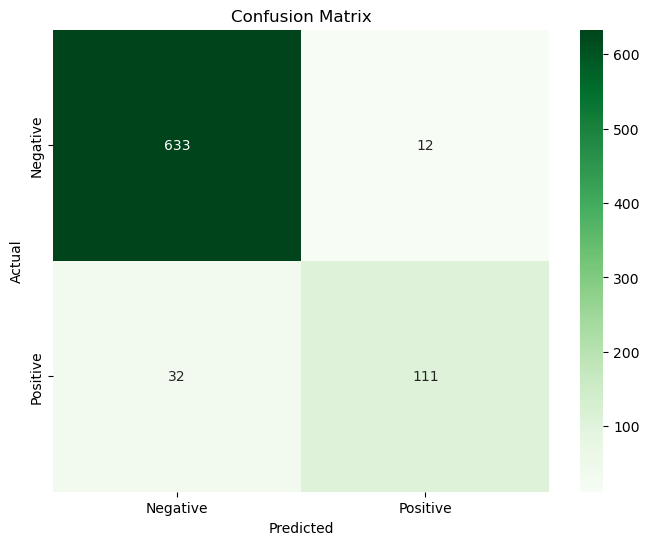

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred) #Creating confusion matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print("F1-Score is:", f1_score(y_test, y_pred))
print("Accuracy is:", accuracy_score(y_test, y_pred))

plt.show()

INTERPRETATION:

The above given confusion matrix shows us that the random forest classifier is able to classify the dataset correctly with high accuracy. The F1 score has to be taken as the performance measure as the dataset is unbalanced and the calculated f1 score as can be seen above is 0.835 which shows us that the model is working appropriately for the given data.

In [11]:
# Reading sample data set CSV file and storing the data in a new DataFrame 'new_df' 
new_df=pd.read_csv("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//DA//Iranian Customer Churn_Test.csv")
new_df# Displaying the content of the new DataFrame

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,7,1,34,6,2405,49,25,12,5,1,2,55,409
1,7,5,30,1,2035,59,35,6,5,2,1,50,277
2,11,4,28,7,2510,18,37,4,2,2,2,25,1294
3,6,2,31,9,1587,53,30,4,3,1,2,35,867
4,10,1,35,6,2953,44,14,6,3,2,1,40,809
5,4,3,31,5,1947,27,48,3,3,2,2,35,651


In [12]:
new_y_pred=pipeline.predict(new_df) # Making predictions on the new data using the pre-trained pipeline
print("The prediction for the sample data set is:", new_y_pred) # Displaying the predictions for the sample data set

The prediction for the sample data set is: [0 0 0 0 0 0]


INTERPRETATION:

The above prediction for the "Churning" of the customer made for our sample dataset can be safely assumed to be correct as the performance measure of the model is pretty high. This leads us to belive that the customers in our sample dataset are not to leave the services of the service provider assuming that 0 meaning the customer is staying and 1 meaning the customer is no longer using the services of the service provider.

Task 2

PROBLEM IDENTIFICATION:

In constructing a data pipeline and deploying a random forest classifier for the classification of heart failure outcomes using a dataset of 299 patients' medical records, several critical issues need consideration. Firstly, a meticulous examination for class imbalances in the target variable, "death event," is essential to gauge the potential impact on the model's predictive accuracy. Simultaneously, identifying and addressing missing values in any of the 13 clinical features, as well as handling outliers in numerical variables like age, CPK, and platelets, is paramount for robust model performance. Furthermore, ensuring the appropriate scaling of numerical features and encoding of categorical variables, such as "sex" and "smoking," is crucial for the random forest classifier's effective learning. Additionally, a thoughtful analysis of feature correlations and the adoption of a sound validation strategy, like cross-validation, are pivotal for obtaining reliable and consistent model results. Hyperparameter tuning and the incorporation of interpretability tools for random forests contribute to refining the model's predictive capabilities. Lastly, maintaining clinical relevance in the chosen features is vital to ensuring that the model aligns with the context of heart failure prediction. Addressing these considerations will contribute to the successful implementation of a robust data pipeline and random forest classifier for heart failure classification.

In [116]:
# Reading data set CSV file and storing the data in a new DataFrame 'df1' 
df1=pd.read_csv("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//DA//hcvdat0.csv")
df1.head(2)# Displaying the content of the new DataFrame

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


In [117]:
df1.rename(columns={'Unnamed: 0': 'Sr. No.'}, inplace=True)# Renaming the column 'Unnamed: 0' to 'Sr. No.' in DataFrame df1
df1.head(2)

,Sr. No.,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


In [118]:
# Printing the sum of missing values in each column of DataFrame df1
print("Sum of NA Values:")
print(df1.isna().sum())

# Displaying an empty line for better readability
print()

# Printing the shape (number of rows and columns) of DataFrame df1
print("Shape of df1:", df1.shape)

Sum of NA Values:
Sr. No.      0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

Shape of df1: (615, 14)


In [119]:
df1.info() #Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sr. No.   615 non-null    int64  
 1   Category  615 non-null    object 
 2   Age       615 non-null    int64  
 3   Sex       615 non-null    object 
 4   ALB       614 non-null    float64
 5   ALP       597 non-null    float64
 6   ALT       614 non-null    float64
 7   AST       615 non-null    float64
 8   BIL       615 non-null    float64
 9   CHE       615 non-null    float64
 10  CHOL      605 non-null    float64
 11  CREA      615 non-null    float64
 12  GGT       615 non-null    float64
 13  PROT      614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [120]:
# Importing LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder instance
le = LabelEncoder()

# Encoding the 'Category' column in DataFrame df1
df1['Category'] = le.fit_transform(df1['Category'])

# Encoding the 'Sex' column in DataFrame df1
df1['Sex'] = le.fit_transform(df1['Sex'])

In [121]:
# Filling missing values in the column with the mean value
df1['ALB'] = df1['ALB'].fillna(df1['ALB'].mean())
df1['ALP'] = df1['ALP'].fillna(df1['ALP'].mean())
df1['ALT'] = df1['ALT'].fillna(df1['ALT'].mean())
df1['CHOL'] = df1['CHOL'].fillna(df1['CHOL'].mean())
df1['PROT'] = df1['PROT'].fillna(df1['PROT'].mean())

In [122]:
df1.isna().sum() #Checking for missing values

Sr. No.     0
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [132]:
from sklearn.preprocessing import StandardScaler# Importing StandardScaler from scikit-learn
sc=StandardScaler()# Creating a StandardScaler instance

# Scaling the columns in DataFrame df1
df1['Age']=sc.fit_transform(df1[['Age']])
df1['ALB']=sc.fit_transform(df1[['ALB']])
df1['ALP']=sc.fit_transform(df1[['ALP']])
df1['ALT']=sc.fit_transform(df1[['ALT']])
df1['AST']=sc.fit_transform(df1[['AST']])
df1['BIL']=sc.fit_transform(df1[['BIL']])
df1['CHE']=sc.fit_transform(df1[['CHE']])
df1['CHOL']=sc.fit_transform(df1[['CHOL']])
df1['CREA']=sc.fit_transform(df1[['CREA']])
df1['GGT']=sc.fit_transform(df1[['GGT']])
df1['PROT']=sc.fit_transform(df1[['PROT']])

In [133]:
df1.head(2)

,Sr. No.,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,-1.533616,1,-0.540647,-0.616004,-0.816054,-0.383693,-0.198236,-0.574734,-1.904676,0.49707,-0.502286,-0.564372
1,2,0,-1.533616,1,-0.540647,0.078682,-0.410992,-0.305057,-0.381375,1.349161,-0.506078,-0.14659,-0.438203,0.826102


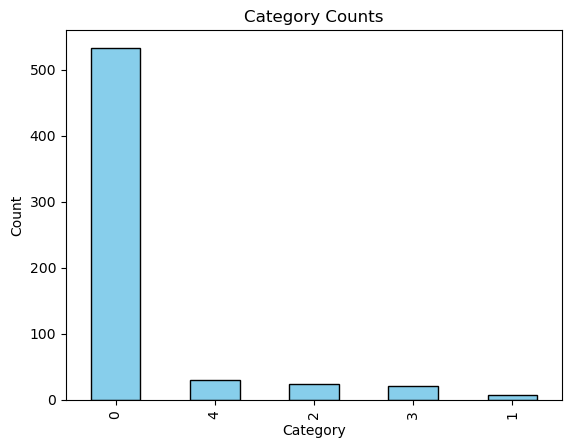

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# If not, replace 'df' with the actual name of your dataframe

data = df1

# Create a bar chart for the 'Category' column
category_counts = data['Category'].value_counts()
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [125]:
df1["Category"].value_counts()# Displaying the count of unique values in the 'Category' column of DataFrame df1

Category
0    533
4     30
2     24
3     21
1      7
Name: count, dtype: int64

In [136]:
dataWithoutLabels = df1.drop(["Category","Sr. No."], axis = 1)# Creating a DataFrame 'dataWithoutLabels' by dropping specified columns

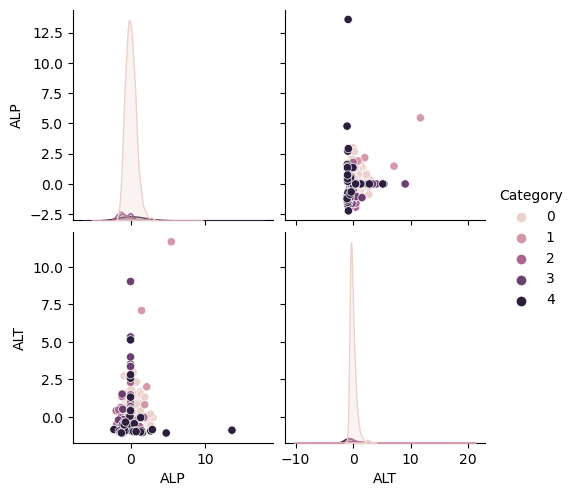

In [137]:
# ALP and ALT features will be used for clustering. How our data looks.
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df1.loc[:,['ALP','ALT', 'Category']], hue = "Category", palette= None)
plt.show()

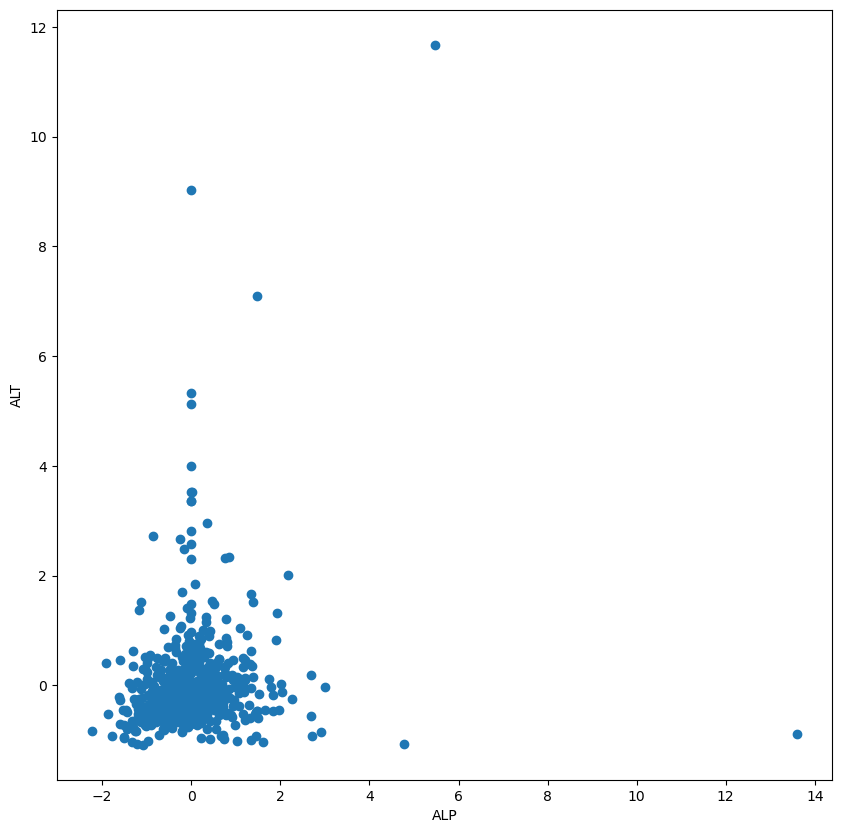

In [138]:
# Our data looks like below plot without diagnosis label

plt.figure(figsize = (10, 10))
plt.scatter(dataWithoutLabels["ALP"], dataWithoutLabels["ALT"])
plt.xlabel('ALP')
plt.ylabel('ALT')
plt.show()

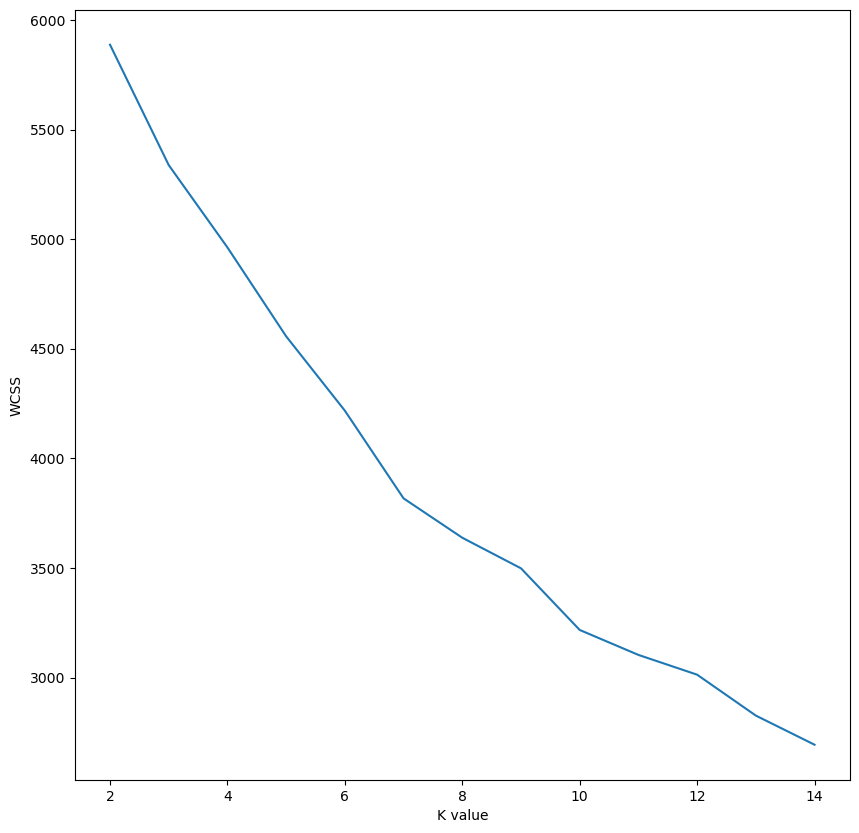

In [144]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(2, 15):# Looping over a range of values for K (number of clusters)
    kmeansForLoop = KMeans(n_clusters = k)# Creating a KMeans model with the current K value
   # Fitting the model on the data without labels
    kmeansForLoop.fit(dataWithoutLabels)
    
    # Appending the WCSS (inertia) to the list
    wcss.append(kmeansForLoop.inertia_)

# Plotting the Elbow Method graph to find the optimal K value
plt.figure(figsize = (10, 10))
plt.plot(range(2, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

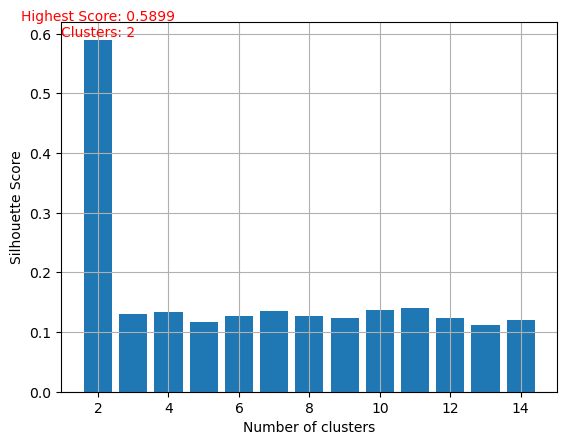

In [145]:
from sklearn.metrics import silhouette_score
# Initializing an empty list to store silhouette scores
silhouette_scores = []


# Looping over a range of cluster values and calculating silhouette scores
for n_cluster in range(2, 15):
    silhouette_scores.append(
        silhouette_score(dataWithoutLabels, KMeans(n_clusters=n_cluster).fit_predict(dataWithoutLabels)))
 
    
# Plotting a bar graph to compare the results 
k = list(range(2, 15))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()

# Find the index of the maximum silhouette score
max_index = silhouette_scores.index(max(silhouette_scores))
best_num_clusters = max_index + 2  # Adding 2 to get the actual number of clusters
best_silhouette_score = max(silhouette_scores)
# Display the highest silhouette score and corresponding number of clusters under the graph
plt.text(best_num_clusters, best_silhouette_score, 
         f'Highest Score: {best_silhouette_score:.4f}\nClusters: {best_num_clusters}', 
         va='bottom', ha='center', color='red', fontsize=10)

plt.show() 

In [141]:
dataWithoutLabels = df1.drop(["Category","Sr. No."], axis = 1)# Creating a DataFrame 'dataWithoutLabels' by dropping specified columns

# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scalar = StandardScaler()# Creating a StandardScaler instance
kmeans = KMeans(n_clusters = 2)# Creating a KMeans clustering model with 2 clusters
pipe = make_pipeline(scalar, kmeans)# Creating a pipeline to scale and apply KMeans clustering
pipe.fit(dataWithoutLabels)# Fitting the pipeline on the data without labels
labels = pipe.predict(dataWithoutLabels)# Predicting cluster labels for the data without labels
df2 = pd.DataFrame({'labels': labels, "Category" : df1['Category']})# Creating a DataFrame 'df2' with predicted labels and the original 'Category' column
ct = pd.crosstab(df2['labels'], df2['Category'])# Creating a cross-tabulation (contingency table) to compare predicted labels with actual categories
print(ct) #Displaying the results

Category    0  1   2   3   4
labels                      
0           4  6   2   1  23
1         529  1  22  20   7


INTERPRETATION for the result:

As can be seen from the above table it is evident that k-means is not an appropriate clustering model for this dataset as it is not able to create clusters and allocate it as per the labels. The indication is clear as it is able to cluster only 5 data points appropriately while the remaining are not labelled correctly. Leading us to believe that either the dataset requires more fine tuning or a different model needs to be used.

In [146]:
# Creating a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2)

# Predicting cluster labels for the data without labels
clusters = kmeans.fit_predict(dataWithoutLabels)

# Assigning cluster labels to a new column 'type' in the DataFrame
dataWithoutLabels["type"] = clusters

# Displaying unique values in the 'type' column (cluster labels)
dataWithoutLabels["type"].unique()

array([0, 1])

In [143]:
dataWithoutLabels.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,type
0,-1.533616,1,-0.540647,-0.616004,-0.816054,-0.383693,-0.198236,-0.574734,-1.904676,0.497070,-0.502286,-0.564372,0
1,-1.533616,1,-0.540647,0.078682,-0.410992,-0.305057,-0.381375,1.349161,-0.506078,-0.146590,-0.438203,0.826102,0
2,-1.533616,1,0.914850,0.250402,0.304747,0.538767,-0.269457,0.291926,-0.149747,0.094783,-0.115957,1.345212,0
3,-1.533616,1,0.273738,-0.635517,0.084520,-0.368571,0.381706,-0.393234,-0.559528,-0.025903,-0.104971,0.677784,0
4,-1.533616,1,-0.419356,0.226986,0.163172,-0.302033,-0.091404,0.432588,-0.933675,-0.106361,-0.176378,-0.619991,0


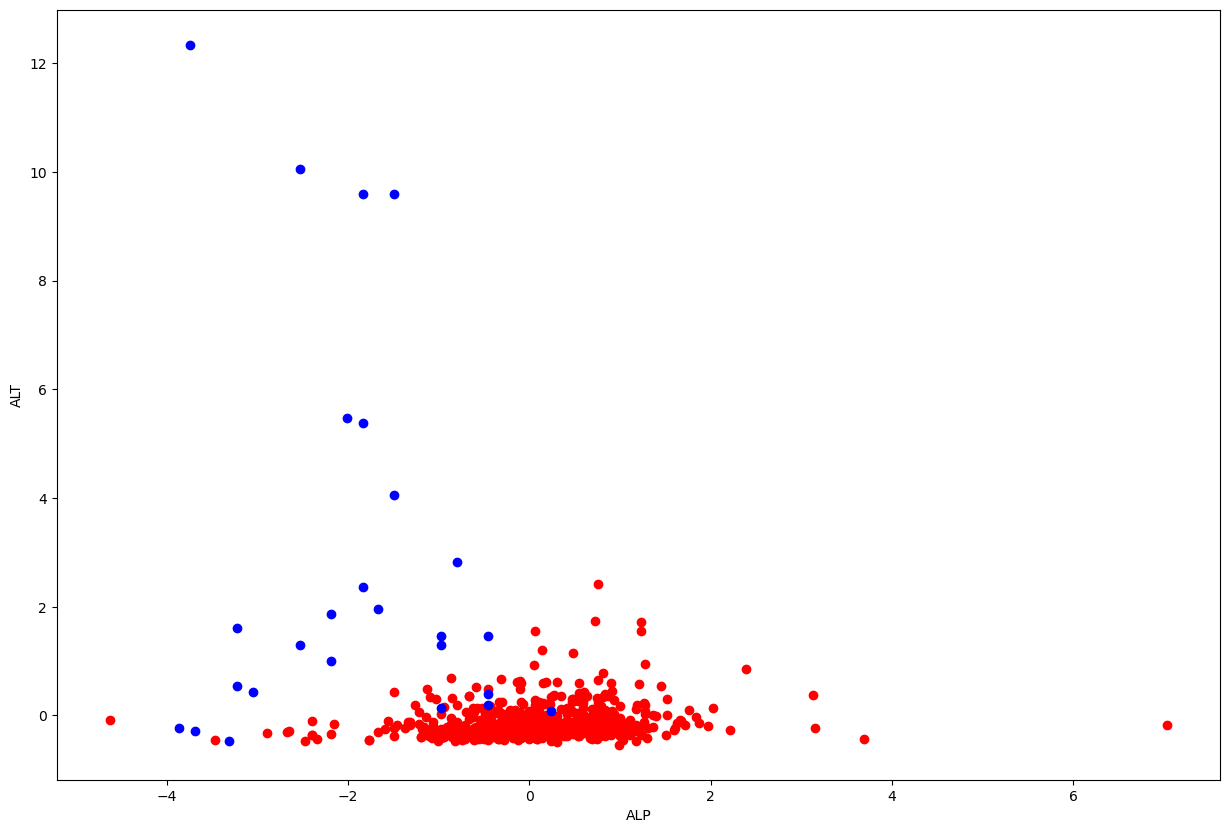

In [96]:
# Plot data after k = 2 clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["ALB"][dataWithoutLabels["type"] == 0], dataWithoutLabels["BIL"][dataWithoutLabels["type"] == 0], color = "red")
plt.scatter(dataWithoutLabels["ALB"][dataWithoutLabels["type"] == 1], dataWithoutLabels["BIL"][dataWithoutLabels["type"] == 1], color = "blue")
plt.xlabel('ALP')
plt.ylabel('ALT')
plt.show()

In [97]:
# Accessing the cluster centers from the KMeans model
kmeans.cluster_centers_

array([[-4.07913648e-02,  6.07809847e-01,  8.59086811e-02,
        -4.67986827e-02, -4.96612577e-03, -1.25202037e-01,
        -1.26323794e-01,  9.56743179e-02,  5.11875752e-02,
         5.79967567e-04, -1.16286363e-01,  3.70174323e-02],
       [ 9.24081303e-01,  7.30769231e-01, -1.94616205e+00,
         1.06017016e+00,  1.12501849e-01,  2.83630769e+00,
         2.86171980e+00, -2.16739128e+00, -1.15959545e+00,
        -1.31384960e-02,  2.63433339e+00, -8.38587217e-01]])

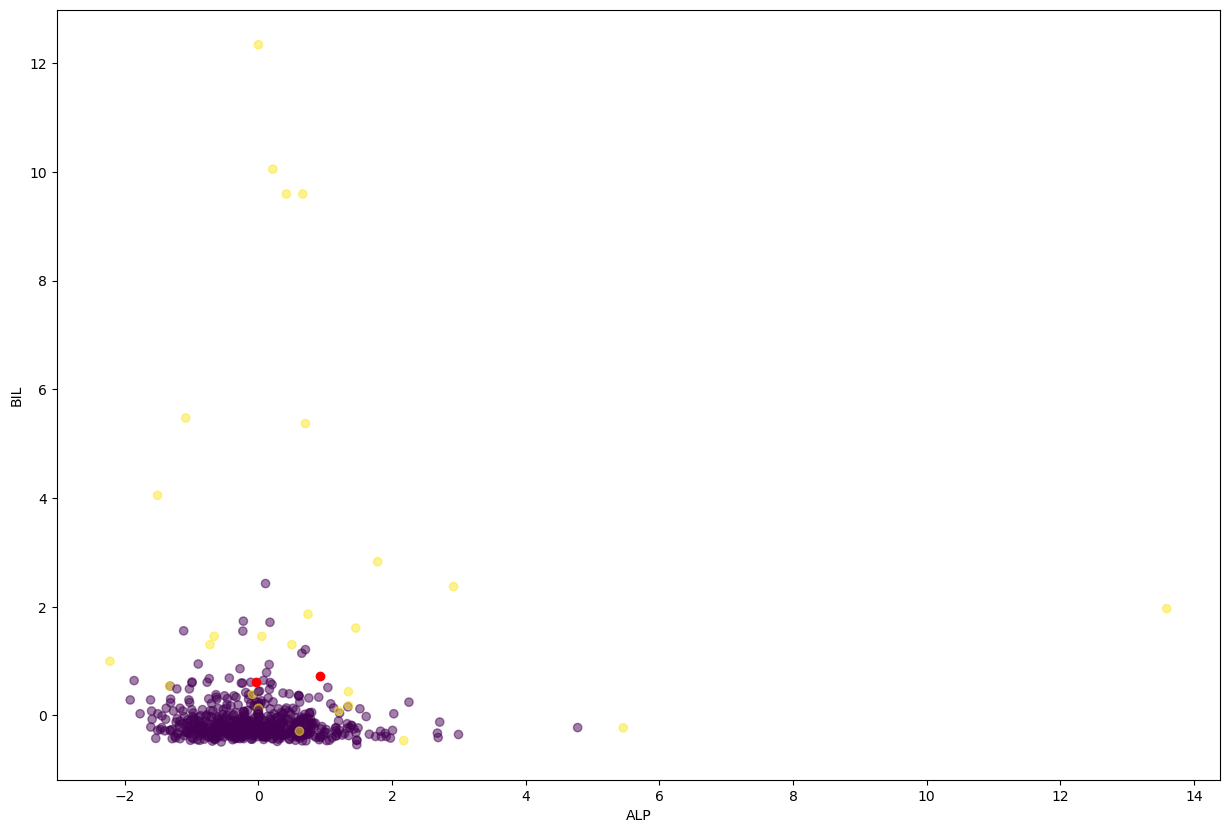

In [98]:
# Data centroids middle of clustered scatters

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["ALP"], dataWithoutLabels["BIL"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('ALP')
plt.ylabel('BIL')
plt.show()

In [99]:
# Predicting cluster labels for the data without labels using the fitted KMeans model
labels = kmeans.fit_predict(dataWithoutLabels)

In [147]:
# Assigning predicted cluster labels to a new column 'type' in the DataFrame
dataWithoutLabels['type'] = labels

# Adding the actual 'Category' labels from the original DataFrame to a new column 'ActualLabels'
dataWithoutLabels['ActualLabels'] = df1['Category']

# Displaying the first 2 rows of the DataFrame
dataWithoutLabels.head(2)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,type,ActualLabels
0,-1.533616,1,-0.540647,-0.616004,-0.816054,-0.383693,-0.198236,-0.574734,-1.904676,0.49707,-0.502286,-0.564372,1,0
1,-1.533616,1,-0.540647,0.078682,-0.410992,-0.305057,-0.381375,1.349161,-0.506078,-0.14659,-0.438203,0.826102,1,0


In [101]:
# Creating a cross-tabulation (contingency table) to compare predicted cluster labels with actual 'Category' labels
pd.crosstab(dataWithoutLabels['type'], dataWithoutLabels['ActualLabels'])


ActualLabels,0,1,2,3,4
type,,,,,
0,4,6,2,1,23
1,529,1,22,20,7


In [102]:
# Accessing the inertia (within-cluster sum of squares) from the fitted KMeans model
kmeans.inertia_


5894.129792909031

In [149]:
# Counting the number of correctly labeled samples
correct_labels = sum(dataWithoutLabels['type'] == dataWithoutLabels['ActualLabels'])

# Displaying the result: number of correct labels out of the total number of samples
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, labels.size))


Result: 5 out of 615 samples were correctly labeled.


In [148]:
# Calculating and printing the accuracy score
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(labels.size)))

Accuracy score: 0.01


INTERPRETATION:

The accuracy score of the model is extremely low. This solidfies our belief that the model is not appropriately labelling the dataset.